In [118]:
import math
import matplotlib.pyplot as plt
import numpy as np

from io import StringIO
from matplotlib.patches import Rectangle
from IPython.display import Image
import imageio

In [134]:
def plot_scenario1_soln(title, soln):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()
    ax.add_patch(Rectangle((0, 5), 7.5, 10))
    ax.add_patch(Rectangle((12.5, 5), 7.5, 10))
    ax.plot(arr[:, 0], arr[:, 1], color="r")
    ax.plot(arr[:, 2], arr[:, 3], color="g")
    ax.plot(arr[:, 4], arr[:, 5], color="b")
    ax.plot(arr[:, 6], arr[:, 7], color="y")
    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=0, right=20)
    ax.set_ylim(bottom=0, top=20)
    plt.show()

def animate_scenario1(title, soln):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")

    def create_frame (i):

        fig, ax = plt.subplots()
        
        ax.add_patch(Rectangle((0, 5), 7.5, 10))
        ax.add_patch(Rectangle((12.5, 5), 7.5, 10))

        ax.set_xlabel("x position")
        ax.set_ylabel("y position")
        ax.set_title(title)
        ax.set_xlim(left=0, right=20)
        ax.set_ylim(bottom=0, top=20)

        ax.set_aspect(1)

        for j in range(0, 8, 2):
            plt.scatter(arr[i, j] , arr[i, j+1], s=1000)
            ax.plot(arr[i-1:i+1, j], arr[i-1:i+1, j+1])

        plt.savefig(f'images/scenario1_img_{i}.png', transparent = False, facecolor = 'white')
        plt.close()
    
    for i in range(len(arr)):
        create_frame(i)
        
    frames = []

    for i in range(len(arr)):
        image = imageio.v2.imread(f'images/scenario1_img_{i}.png')
        frames.append(image)

    imageio.mimsave('./scenario1.gif', frames, duration = 50, loop = 1) 

def plot_scenario2_soln(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")
    _, ax = plt.subplots()
    
    styles = ["r", "g", "b", "y"][:robot_count//2] + ["r--", "g--", "b--", "y--"][:robot_count//2]
    
    for j in range(0, robot_count*2, 2):
        ax.plot(arr[:, j], arr[:, j+1], styles[j//2])

    ax.set_xlabel("x position")
    ax.set_ylabel("y position")
    ax.set_title(title)
    ax.set_xlim(left=-5, right=25)
    ax.set_ylim(bottom=-5, top=25)
    plt.show()

def animate_scenario2(title, soln, robot_count=8):
    arr = np.loadtxt(StringIO(soln), delimiter=" ")

    def create_frame (i):

        fig, ax = plt.subplots()

        ax.set_xlabel("x position")
        ax.set_ylabel("y position")
        ax.set_title(title)
        ax.set_xlim(left=-5, right=25)
        ax.set_ylim(bottom=-5, top=25)

        ax.set_aspect(1)

        for j in range(0, robot_count*2, 2):
            plt.scatter(arr[i, j] , arr[i, j+1], s=1000)
            ax.plot(arr[i-1:i+1, j], arr[i-1:i+1, j+1])

        plt.savefig(f'images/scenario2_img_{i}.png', transparent = False, facecolor = 'white')
        plt.close()
    
    for i in range(len(arr)):
        create_frame(i)
        
    frames = []

    for i in range(len(arr)):
        image = imageio.v2.imread(f'images/scenario2_img_{i}.png')
        frames.append(image)

    imageio.mimsave('./scenario2.gif', frames, duration = 50, loop = 1) 


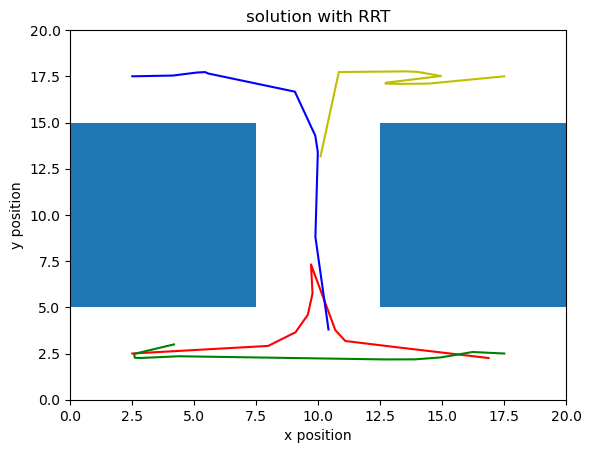

In [135]:
rrt_soln1 = """
2.5 2.5 17.5 2.5 2.5 17.5 17.5 17.5
7.98204 2.91142 16.2254 2.58232 4.1414 17.5425 14.4398 17.1054
9.08323 3.65245 14.9436 2.29013 5.10542 17.7051 13.1598 17.091
9.57783 4.59656 13.8993 2.18513 5.43933 17.7285 12.7058 17.11
9.76843 5.74934 12.6863 2.18038 5.55609 17.6542 12.7391 17.1579
9.7056 7.32156 4.38067 2.35196 9.0569 16.6695 14.9503 17.5151
10.6861 3.76823 2.8293 2.25828 9.87942 14.2875 14.0111 17.7391
11.0905 3.17749 2.60074 2.26999 9.98149 13.3936 13.5494 17.7682
13.0989 2.85091 2.57424 2.48011 9.8836 8.81104 10.8283 17.733
16.8682 2.25552 4.1797 2.99381 10.4125 3.80198 10.0918 13.1719
"""

plot_scenario1_soln("solution with RRT", rrt_soln1)

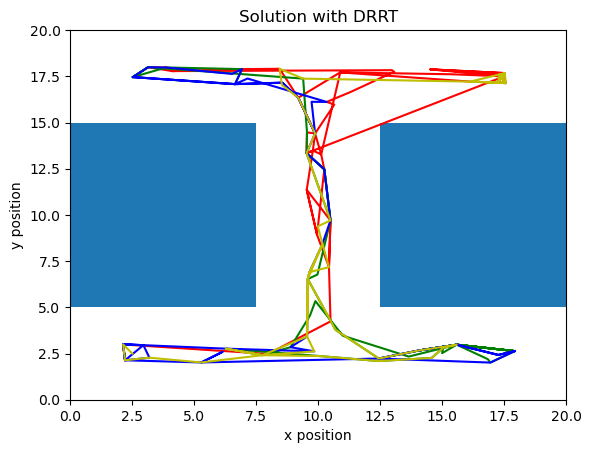

In [137]:
drrt_soln1 = """
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.20765 2.13462 17.2556 2.42368 2.52174 17.4576 17.5 17.5
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
2.13122 2.9912 15.5833 2.97848 6.64203 17.0774 17.2563 17.2237
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
7.97869 2.47804 14.0389 2.66018 8.54948 17.1561 17.5161 17.6753
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4943 4.23968 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4316 7.17465 13.6449 2.33536 9.8712 14.4058 17.56 17.134
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
10.4926 9.69971 10.9897 3.46294 9.72904 16.1213 17.5161 17.6753
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.53429 11.3588 9.88353 5.33686 10.3406 16.1141 17.2914 17.5977
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.94954 8.93103 9.66435 4.55248 7.14683 17.3798 16.134 17.2141
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.53429 11.3588 8.88094 2.84262 6.64203 17.0774 17.56 17.134
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.78183 13.4839 7.74768 2.41057 6.92588 17.8904 16.134 17.2141
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
9.8712 14.4058 6.27233 2.76347 6.52007 17.6302 17.56 17.134
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.6456 15.9705 10.0753 2.36061 3.8651 17.979 16.134 17.2141
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
10.3406 16.1141 12.4351 2.09268 3.13636 17.992 17.56 17.134
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
11.3203 16.6628 14.5745 2.26169 2.52174 17.4576 16.134 17.2141
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
13.0632 17.7496 15.0339 2.80971 6.64203 17.0774 17.56 17.134
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
12.966 17.8319 14.9926 2.52005 8.54948 17.1561 17.2914 17.5977
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
13.0632 17.7496 15.5833 2.97848 9.19274 16.3422 17.2563 17.2237
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
12.966 17.8319 17.9252 2.63138 9.8712 14.4058 17.56 17.134
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
4.11383 17.7826 16.936 2.01008 9.52721 13.3422 16.134 17.2141
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
3.8651 17.979 16.8383 2.19396 10.2427 12.4697 9.39073 17.3752
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
4.11383 17.7826 15.5833 2.97848 10.4926 9.69971 8.43976 17.907
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
3.8651 17.979 17.9252 2.63138 10.1469 8.358 8.53241 17.0342
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
4.11383 17.7826 15.5833 2.97848 9.64425 6.90452 9.19274 16.3422
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.13636 17.992 17.9252 2.63138 9.57471 6.53048 9.8712 14.4058
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
3.8651 17.979 15.5833 2.97848 9.54872 3.41797 9.52721 13.3422
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
4.11383 17.7826 14.0389 2.66018 8.88094 2.84262 10.4926 9.69971
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
6.92588 17.8904 15.5833 2.97848 9.83812 2.61703 9.97732 9.37998
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
8.43976 17.907 17.9252 2.63138 6.27233 2.76347 10.4316 7.17465
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.19274 16.3422 15.5833 2.97848 2.94798 2.95229 9.64425 6.90452
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
9.8712 14.4058 17.9252 2.63138 3.19052 2.27493 10.4316 7.17465
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.1172 13.2722 15.5833 2.97848 2.20765 2.13462 9.64425 6.90452
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.2427 12.4697 14.0389 2.66018 2.13122 2.9912 9.57471 6.53048
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4926 9.69971 15.5833 2.97848 2.94798 2.95229 9.54872 3.41797
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
10.4316 7.17465 14.0389 2.66018 2.13122 2.9912 9.83812 2.61703
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
9.94954 8.93103 12.4409 2.22894 2.94798 2.95229 7.74768 2.41057
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
10.2427 12.4697 10.693 3.78563 2.20765 2.13462 6.27233 2.76347
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.52721 13.3422 9.57471 6.53048 2.13122 2.9912 7.74768 2.41057
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.54508 14.468 9.96614 6.77154 2.20765 2.13462 10.0753 2.36061
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.8712 14.4058 10.4926 9.69971 2.13122 2.9912 12.4351 2.09268
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
9.19274 16.3422 10.2427 12.4697 2.94798 2.95229 14.5745 2.26169
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
10.8858 17.7132 9.52721 13.3422 2.13122 2.9912 15.0339 2.80971
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
16.134 17.2141 10.4926 9.69971 2.20765 2.13462 15.5833 2.97848
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.56 17.134 10.2427 12.4697 5.28362 2.01626 14.0389 2.66018
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
17.2914 17.5977 9.52721 13.3422 6.13665 2.58783 12.4409 2.22894
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
14.5146 17.8775 9.54508 14.468 5.28362 2.01626 10.693 3.78563
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
17.5161 17.6753 9.39073 17.3752 12.4409 2.22894 9.57471 6.53048
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
14.5146 17.8775 3.13636 17.992 16.936 2.01008 10.1469 8.358
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
17.5 17.5 2.52174 17.4576 17.9252 2.63138 9.64425 6.90452
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.52721 13.3422 3.13636 17.992 17.2556 2.42368 9.57471 6.53048
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.78183 13.4839 2.52174 17.4576 15.5833 2.97848 9.54872 3.41797
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.97223 13.3614 6.64203 17.0774 14.0389 2.66018 7.74768 2.41057
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.78183 13.4839 6.92588 17.8904 12.4409 2.22894 5.28362 2.01626
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
9.97223 13.3614 3.8651 17.979 14.0389 2.66018 3.19052 2.27493
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.1172 13.2722 2.52174 17.4576 15.5833 2.97848 2.20765 2.13462
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
10.8858 17.7132 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
15.3587 17.6115 2.52174 17.4576 17.9252 2.63138 2.5 2.5
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.5 17.5 3.13636 17.992 17.2556 2.42368 2.13122 2.9912
17.56 17.134 2.52174 17.4576 17.9252 2.63138 2.5 2.5
"""

plot_scenario1_soln("Solution with DRRT", drrt_soln1)

In [138]:
animate_scenario1("Solution with DRRT", drrt_soln1)

![SegmentLocal](scenario1.gif "segment")

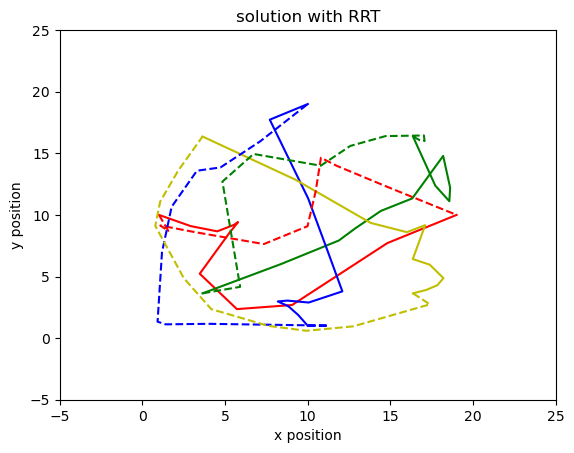

In [142]:
rrt_soln2 = """
19 10 16.364 16.364 10 19 3.63604 16.364 1 10 3.63604 3.63604 10 1 16.364 3.63604
14.8136 7.71435 17.7134 12.3738 7.70201 17.731 9.27623 12.847 1.5631 8.70381 5.90994 4.1612 11.2395 1.01478 17.3827 2.74142
9.05446 2.68916 18.5624 11.1109 10.0282 11.3237 13.8002 9.35276 1.07949 9.1402 4.83697 12.706 3.99465 1.1604 12.7551 0.956318
5.71402 2.35415 18.6122 12.2069 11.1848 7.12655 15.9918 8.60079 3.18469 8.59984 6.72189 14.9483 1.40075 1.11819 9.9146 0.59602
3.46554 5.2265 18.1894 14.7891 12.0919 3.79508 17.1006 9.16591 7.34424 7.63406 10.7827 13.995 0.914747 1.33447 7.6105 0.996341
5.27408 8.56596 16.3169 11.3383 10.0558 2.88899 16.3509 6.41807 9.9844 9.08323 12.5706 15.5991 1.18218 6.96715 4.16342 2.35243
5.7809 9.41457 14.4235 10.3273 8.76546 3.04592 17.3786 5.95857 10.4779 11.925 14.7024 16.3983 1.76571 10.6588 2.49767 4.87337
5.5298 9.19195 12.8506 8.88865 8.1852 2.97753 18.2071 4.86838 10.7959 14.6429 17.0258 16.448 3.29554 13.5882 0.777737 9.10757
4.52532 8.66608 11.88 7.92296 8.8246 2.5893 17.8383 4.29293 11.7334 13.9971 17.064 15.9974 4.71694 13.8532 1.07103 11.0729
2.9143 9.09448 8.38831 6.01505 9.42264 1.87594 17.1748 3.91509 14.8275 12.2691 16.7917 16.0539 7.11444 15.9649 2.15569 13.5824
1 10 3.63604 3.63604 10 1 16.364 3.63604 19 10 16.364 16.364 10 19 3.63604 16.364
"""

plot_scenario2_soln("Solution with RRT", rrt_soln2)

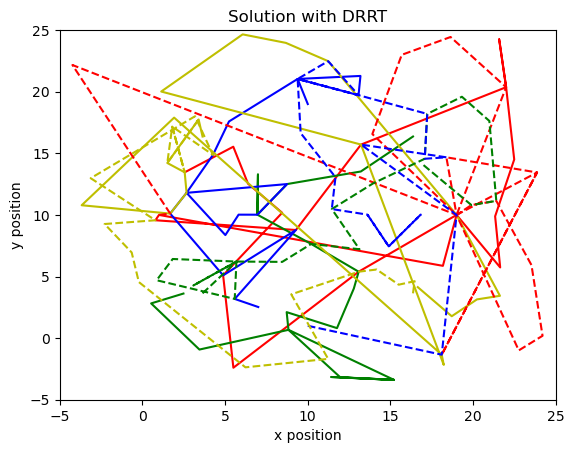

In [158]:
drrt_soln2 = """
19 10 16.364 16.364 10 19 3.63604 16.364 1 10 3.63604 3.63604 10 1 16.364 3.63604
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
18.1722 5.86754 13.2089 13.5253 9.38576 21.0362 3.3976 17.7469 1.6791 10.1071 5.6856 6.21531 18.1021 -1.34408 16.4628 4.61899
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
1 10 8.74632 12.5042 13.1862 21.2817 1.50313 14.2164 -4.23421 22.1682 3.08037 4.27287 19 10 15.499 4.33764
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
0.785194 9.56651 6.95121 10.0186 13.07 19.7198 2.55536 13.4574 19 10 5.6856 6.21531 13.2203 15.7106 14.1702 5.56936
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
9.28249 8.77575 6.9868 13.2769 9.38576 21.0362 2.66868 11.7931 22.7615 -0.996552 5.58184 3.18062 18.3839 14.6761 13.0765 5.39045
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
13.2203 15.7106 6.95121 10.0186 5.23515 17.5858 1.6791 10.1071 24.1993 0.190155 0.858154 4.69925 17.074 14.5585 8.99896 3.55272
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.9967 20.3663 10.2074 7.64383 4.26461 14.8702 -3.67552 10.7848 23.5304 5.92677 1.83104 6.42295 17.2253 18.1982 11.2302 -1.68537
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.5758 24.2496 13.0765 5.39045 2.66868 11.7931 1.91679 17.8971 21.4022 11.1404 5.6856 6.21531 13.07 19.7198 6.22878 -2.3701
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
21.9967 20.3663 12.7859 4.02626 8.74632 12.5042 18.1021 -1.34408 19.896 10.8008 8.45293 6.18783 9.38576 21.0362 -0.218797 4.55221
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
22.4865 14.5011 11.7667 0.811241 6.95121 10.0186 18.2236 -2.17001 19 10 10.2074 7.64383 11.2337 22.48 -0.650935 6.95136
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.3315 9.88707 8.72387 2.1083 5.81525 10.0215 13.2203 15.7106 18.3839 14.6761 13.1265 7.21508 13.07 19.7198 -2.28781 9.26168
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
21.6376 5.73784 8.83121 0.673405 5.01529 8.36474 1.13629 20.0158 23.8682 13.4469 11.4529 10.4756 9.38576 21.0362 0.785194 9.56651
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
19 10 11.9598 -3.17464 2.66868 11.7931 6.06121 24.655 18.1021 -1.34408 13.9583 12.5649 9.56975 16.6429 -3.12987 12.9799
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
13.0765 5.39045 15.2148 -3.38923 1.6791 10.1071 8.6749 23.9649 23.8682 13.4469 17.074 14.5585 11.6763 13.0639 3.18474 18.0111
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
5.50053 -2.40265 11.428 -3.15591 4.88014 5.09578 11.2337 22.48 19 10 17.2253 18.1982 11.4529 10.4756 4.26461 14.8702
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
4.88014 5.09578 15.2148 -3.38923 9.28249 8.77575 19 10 13.9065 16.5656 19.3228 19.5914 13.6084 10.0241 1.80187 17.1707
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
8.45018 10.1744 8.83121 0.673405 4.88014 5.09578 21.6226 3.43361 15.682 22.9939 20.9817 17.6281 14.8966 7.44874 2.55536 13.4574
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
6.3845 12.5371 3.44664 -0.927408 9.28249 8.77575 20.2317 3.14241 18.6356 24.442 21.4022 11.1404 16.8331 10.0269 1.80187 17.1707
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
5.49468 15.5356 0.526188 2.81837 5.58184 3.18062 18.7076 1.77655 21.9967 20.3663 19.896 10.8008 14.8966 7.44874 1.50313 14.2164
2.55536 13.4574 2.47906 3.61759 7.00501 2.52465 16.6536 4.13743 19 10 16.9184 14.1352 13.6084 10.0241 3.3976 17.7469
"""

plot_scenario2_soln("Solution with DRRT", drrt_soln2)

In [ ]:
animate_scenario2("Solution with DRRT", drrt_soln2, robot_count=8)

![SegmentLocal](scenario2.gif "segment")

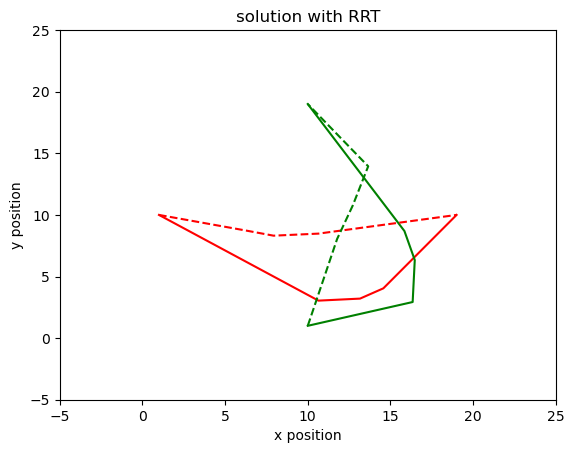

In [160]:
rrt_soln3 = """
19 10 10 19 1 10 10 1
14.5699 4.04032 15.8452 8.69353 6.28908 8.72556 11.7748 8.0494
13.1611 3.20747 16.4713 6.33743 7.93097 8.3155 12.7203 10.7633
10.6462 3.04289 16.3435 2.93002 10.6469 8.48252 13.6542 13.9472
1 10 10 1 19 10 10 19
"""

plot_scenario2_soln("solution with RRT", rrt_soln3, robot_count=4)

In [144]:
animate_scenario2("Solution with RRT", rrt_soln3, robot_count=4)

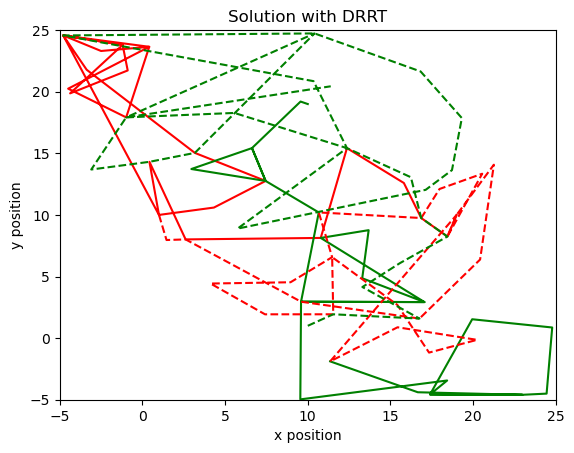

In [163]:
drrt_soln3 = """
19 10 10 19 1 10 10 1
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
18.4461 8.24569 9.56369 19.2021 1 10 11.5399 1.93492
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
16.8607 9.7485 6.62509 15.4241 1.45604 7.96383 16.7556 1.58734
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
15.8122 12.5907 2.95777 13.726 2.61153 8.01226 13.3036 4.1487
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
12.3702 15.4211 7.45151 12.7569 9.59261 2.95536 15.5803 6.09263
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
10.7836 8.13246 6.62509 15.4241 16.7556 1.58734 18.4461 8.24569
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
2.61153 8.01226 7.45151 12.7569 20.4225 6.37856 16.8607 9.7485
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
0.422995 14.3104 10.6648 10.2018 21.2566 14.0778 16.2369 13.0585
1 10 9.59261 2.95536 19 10 12.3702 15.4211
1 10 9.59261 2.95536 19 10 12.3702 15.4211
1 10 9.59261 2.95536 19 10 12.3702 15.4211
1 10 9.59261 2.95536 19 10 12.3702 15.4211
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
4.32292 10.5974 17.0585 2.92517 18.4461 8.24569 10.3485 20.8587
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
7.45151 12.7569 13.2932 4.85877 20.5501 13.3435 -4.79276 24.568
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
3.16899 15.0343 13.6819 8.76299 17.9679 12.1055 10.4113 24.7324
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-3.37293 21.7828 10.7836 8.13246 16.8607 9.7485 16.8268 21.6419
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
-4.79276 24.568 17.0585 2.92517 10.6648 10.2018 19.3191 17.8633
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
0.412272 23.6463 9.59261 2.95536 11.4746 6.57204 18.7215 13.6367
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-0.983941 17.9171 9.54874 -4.97179 8.95669 4.53488 17.1308 12.037
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
-4.49346 20.2476 18.4302 -3.43893 4.11739 4.43086 5.75446 8.88872
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
0.412272 23.6463 17.397 -4.56814 7.41318 1.93215 12.3702 15.4211
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-2.50432 23.3067 22.9753 -4.59989 11.5399 1.93492 5.56032 18.2781
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-4.79276 24.568 17.397 -4.56814 11.4746 6.57204 -0.983941 17.9171
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-1.1984 23.7998 19.9453 1.53169 15.4175 2.69708 10.4113 24.7324
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-4.37541 19.8658 24.784 0.863102 17.3349 -1.1747 3.16899 15.0343
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-0.891423 21.7256 24.4449 -4.50489 20.2381 -0.140057 0.422995 14.3104
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-1.1984 23.7998 22.9753 -4.59989 15.4306 0.879944 -3.09557 13.6866
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
-4.79276 24.568 16.6545 -4.394 11.3539 -1.88712 -0.983941 17.9171
1 10 11.3539 -1.88712 19 10 11.3893 20.4403
"""

plot_scenario2_soln("Solution with DRRT", drrt_soln3, robot_count=4)

In [164]:
animate_scenario2("Solution with DRRT", drrt_soln3, robot_count=4)

![SegmentLocal](scenario3.gif "segment")